In [2]:
# Import Library
import pandas as pd # Data Manipulation
import numpy as np # Data Manipulation
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns # Data Visualisation
import warnings

# To ignore all the warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("insurance.csv")

In [25]:
print("\nNumber of rows and columns in the data set : ", df.shape)
df.head() # Top 5 rows


Number of rows and columns in the data set :  (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Text(0.5, 1.0, 'Charge vs BMI')

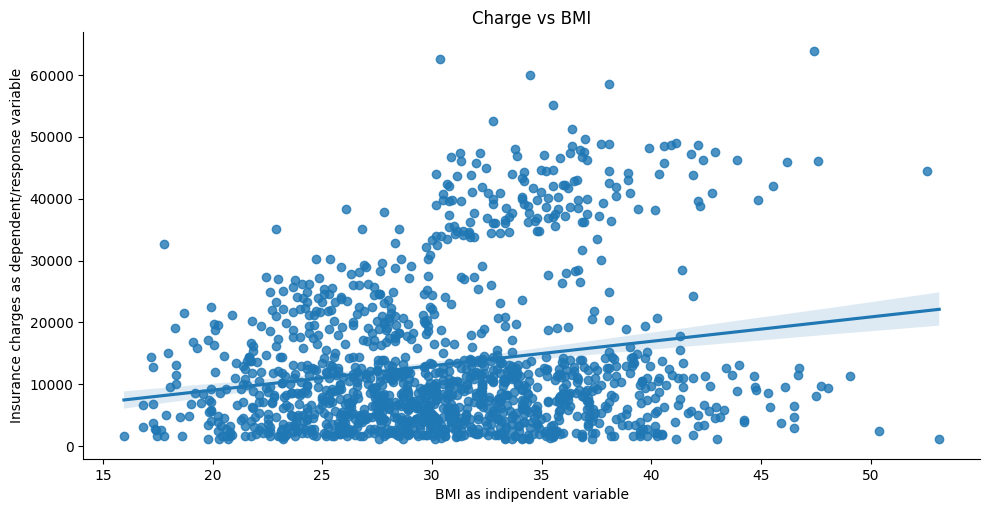

In [8]:
sns.lmplot(x="bmi", y="charges", data=df, aspect=2, height=5)
plt.xlabel("BMI as indipendent variable")
plt.ylabel("Insurance charges as dependent/response variable")
plt.title("Charge vs BMI")

In [10]:
# Exploratory Data Ananlysis
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# Check for missing values
missing_values = df.isnull()

# Summarize the missing values
missing_values_count = missing_values.sum()

# Display the result
print("Missing values in each column")
print(missing_values_count)

Missing values in each column
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<Axes: >

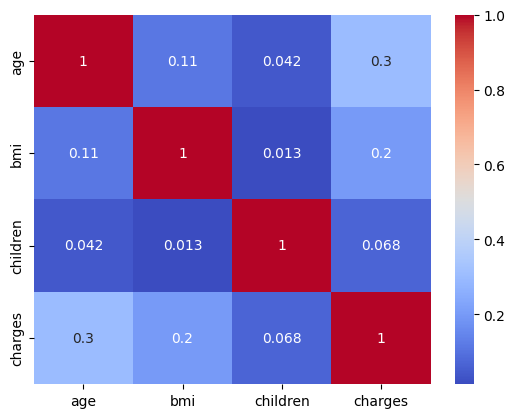

In [13]:
# Correlation Plot
corr = df.corr()
sns.heatmap(corr,cmap="coolwarm", annot=True)

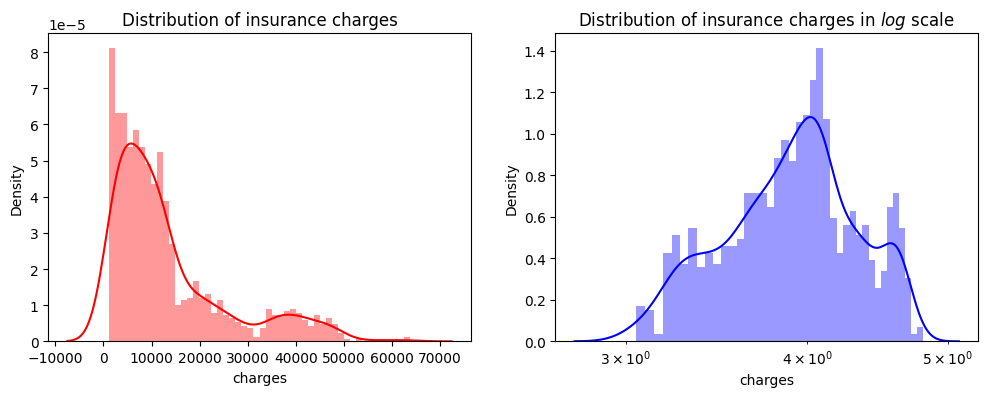

In [14]:
f = plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
sns.distplot(df['charges'], bins=50, color='r', ax=ax)
ax.set_title("Distribution of insurance charges")

ax = f.add_subplot(122)
sns.distplot(np.log10(df['charges']), bins=40, color='b', ax=ax)
ax.set_title('Distribution of insurance charges in $log$ scale')
ax.set_xscale('log')

Text(0.5, 1.0, 'Violin plot of Charges vs Smoker')

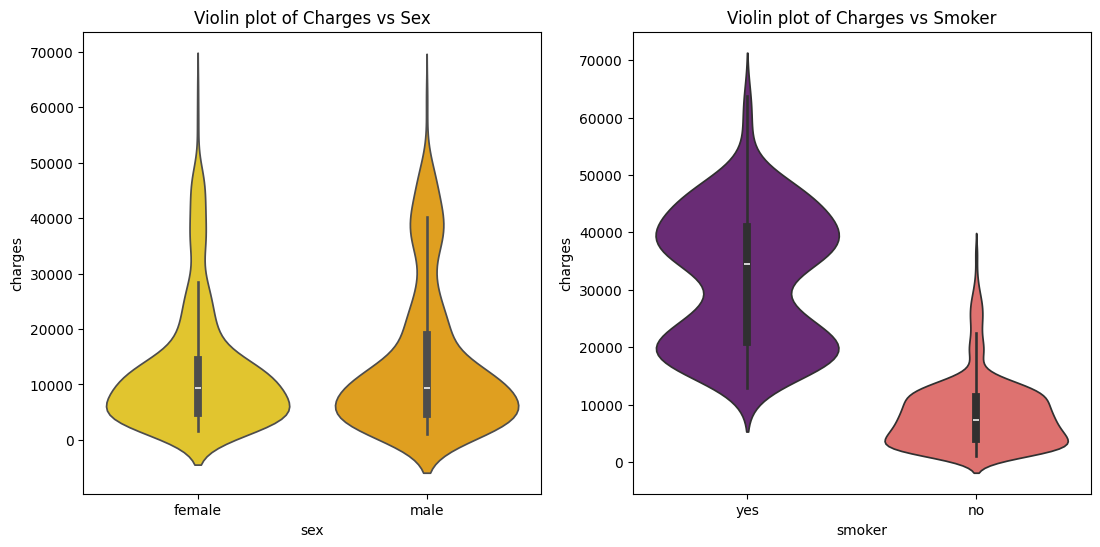

In [16]:
f = plt.figure(figsize=(13,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges', data=df, palette='Wistia', ax=ax)
ax.set_title('Violin plot of Charges vs Sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges', data=df, palette='magma', ax=ax)
ax.set_title('Violin plot of Charges vs Smoker')

Text(0.5, 1.0, 'Boxplot of Charges vs Children')

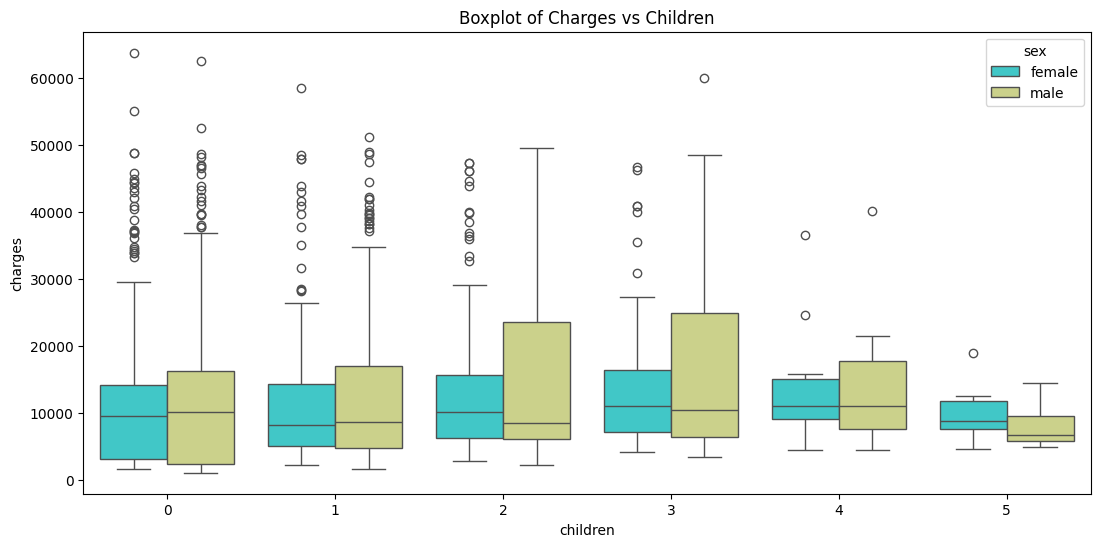

In [18]:
plt.figure(figsize=(13,6))
sns.boxplot(x='children', y='charges', hue='sex', data=df, palette='rainbow')
plt.title('Boxplot of Charges vs Children')

Text(0.5, 1.0, 'Scatter plot of Charges vs Age')

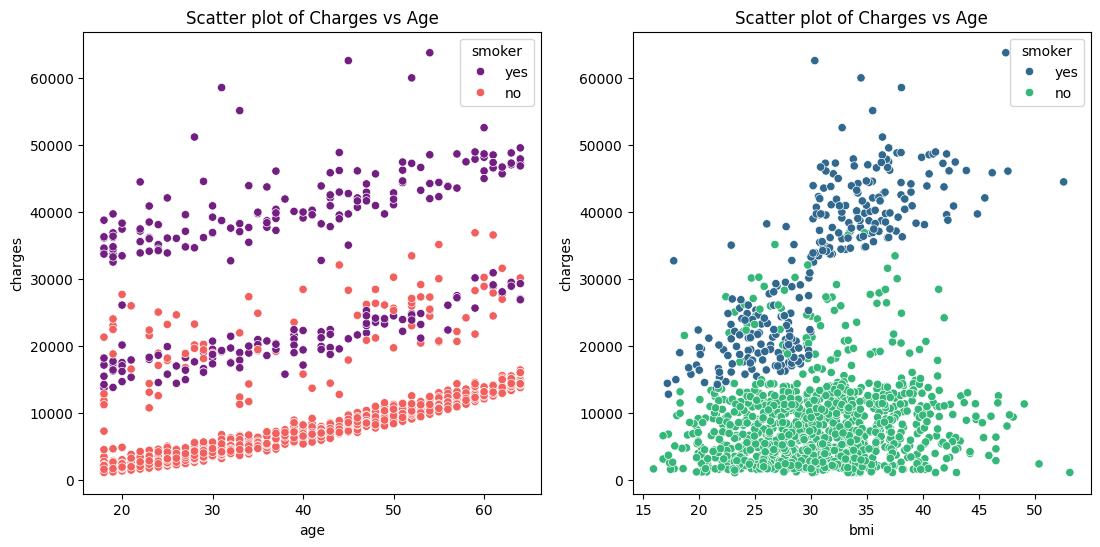

In [19]:
f = plt.figure(figsize=(13,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age', y='charges', data=df, palette='magma', hue='smoker', ax=ax)
ax.set_title('Scatter plot of Charges vs Age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', data=df, palette='viridis', hue='smoker')
ax.set_title('Scatter plot of Charges vs Age')

# Data Processing Encoding
Machine Learning Algirithms cannot work with categorical data directly. Categorical data must be converted to number


```
Label Encoding
One-hot Encoding
Dummy variable trap
```



In [39]:
# Dummy Variable
categorical_columns = ['sex', 'smoker', 'region']
df_encode = pd.get_dummies(data=df, prefix='OHE', prefix_sep='_', columns=categorical_columns, drop_first=True, dtype='int8')

In [40]:
df_encode.head()

,age,bmi,children,charges,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [41]:
df.shape

(1338, 7)

In [42]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   bmi            1338 non-null   float64
 2   children       1338 non-null   int64  
 3   charges        1338 non-null   float64
 4   OHE_male       1338 non-null   int8   
 5   OHE_yes        1338 non-null   int8   
 6   OHE_northwest  1338 non-null   int8   
 7   OHE_southeast  1338 non-null   int8   
 8   OHE_southwest  1338 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 48.5 KB


In [43]:
# Log Transform
df_encode['charges'] = np.log(df_encode['charges'])

**Train Test Split**

In [44]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges', axis=1) # Independent Variable
Y = df_encode['charges'] # Dependent Variable

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=23)

**Model Building**

In [45]:
# Scikit Learning Module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

**Getting the coefficients and intercept**

In [46]:
coefficients = lin_reg.coef_
intercept = lin_reg.intercept_

# Display the coefficients and intercept
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient':coefficients})
print("Intercept : ", intercept)
print("Coefficients : ")
print(coefficients_df)

Intercept :  7.07542806626153
Coefficients : 
         Feature  Coefficient
0            age     0.033057
1            bmi     0.013706
2       children     0.101695
3       OHE_male    -0.069942
4        OHE_yes     1.547184
5  OHE_northwest    -0.054662
6  OHE_southeast    -0.145206
7  OHE_southwest    -0.135254


In [50]:
# Sklearn Regression Module
Y_pred_sk = lin_reg.predict(X_test)

# Evaluation MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(Y_pred_sk, Y_test)

# R-Square
R_square_sk = lin_reg.score(X_test, Y_test)
print("MSE = ", J_mse_sk)
print("R-Square = ", R_square_sk)

MSE =  0.18966235019914413
R-Square =  0.7767840303618612


In [53]:
# Number of Observations
n = len(Y_test)

# Number of features
p = X_test.shape[1]

# Calculating adjusted R-Square
adjusted_r_squared = 1 - (1-R_square_sk)*(n-1)/(n-p-1)
print("Adjusted R-Squared value is : ", adjusted_r_squared)

Adjusted R-Squared value is :  0.7722401938297871


**Model Validation**

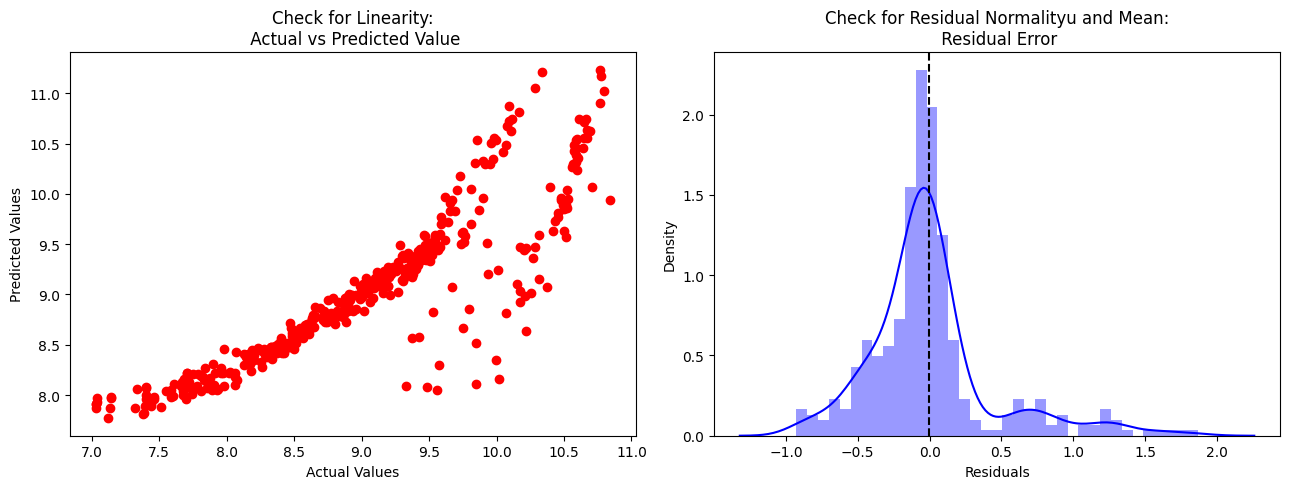

In [54]:
# Check for Linearity
f = plt.figure(figsize=(13,5))

# Scatter Plot
ax = f.add_subplot(121)
ax.scatter(Y_test, Y_pred_sk, color='r')
ax.set_title("Check for Linearity:\n Actual vs Predicted Value")
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")

# Check for Residual Normality and Mean
ax = f.add_subplot(122)
sns.distplot((Y_test-Y_pred_sk), ax=ax, color='b')
ax.axvline((Y_test-Y_pred_sk).mean(), color='k', linestyle='--')
ax.set_title("Check for Residual Normalityu and Mean:\n Residual Error")
ax.set_xlabel("Residuals")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Check for Homoscedasticity: \nResidual vs Predicted')

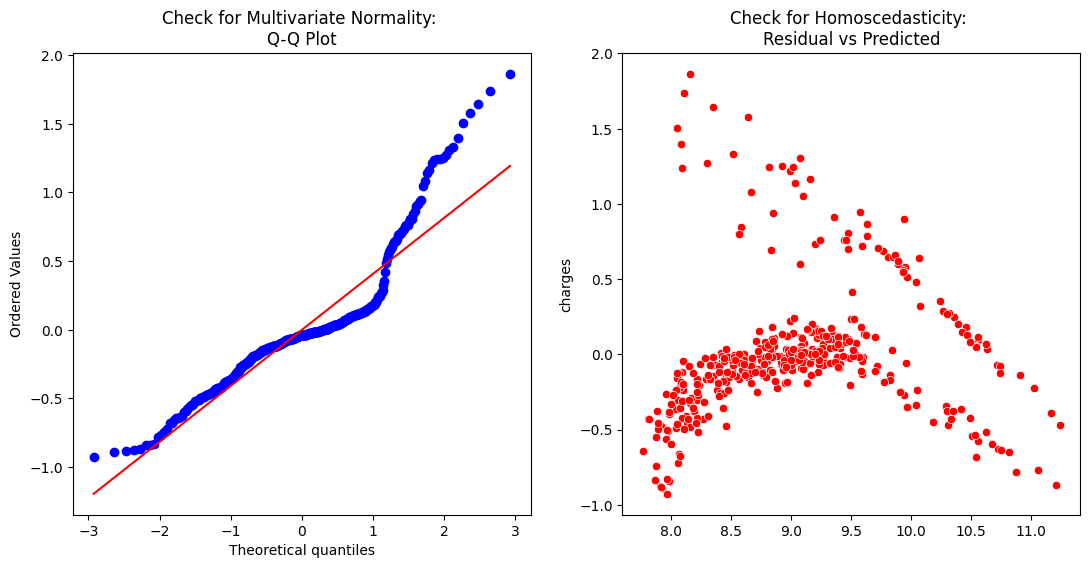

In [56]:
# Check for Multivariate Normality
# Q-Q Plot
f,ax = plt.subplots(1,2,figsize=(13,6))
import scipy as sp
_,(_,_,r) = sp.stats.probplot((Y_test-Y_pred_sk), fit=True, plot=ax[0])
ax[0].set_title("Check for Multivariate Normality: \nQ-Q Plot")

# Check for Homoscedasticity
sns.scatterplot(y = (Y_test-Y_pred_sk), x = Y_pred_sk, ax=ax[1], color='r')
ax[1].set_title("Check for Homoscedasticity: \nResidual vs Predicted")

In [58]:
# Check for Multicollinearity
# Variance Inflation Factor

VIF = 1/(1-R_square_sk)
VIF

4.479966203229661

**Logistic Regression**

In [59]:
df = pd.read_csv("User_Data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [60]:
df.set_index("User ID")

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
...,...,...,...,...
15691863,Female,46,41000,1
15706071,Male,51,23000,1
15654296,Female,50,20000,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [62]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [63]:
X = df.iloc[:, 2:3].values
Y = df.iloc[:, 4].values

# Splitting into Training and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=23)

In [64]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [65]:
# Fitting the Logistic Regression into the Training Set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [68]:
# Predicting the test set results
Y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report
# Generate the classification result
report = classification_report(Y_test, Y_pred)

# Display the report
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.92        79
           1       0.91      0.73      0.81        41

    accuracy                           0.88       120
   macro avg       0.89      0.85      0.86       120
weighted avg       0.89      0.88      0.88       120



In [69]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.8833333333333333

In [71]:
# Making the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[76,  3],
       [11, 30]])

<Axes: >

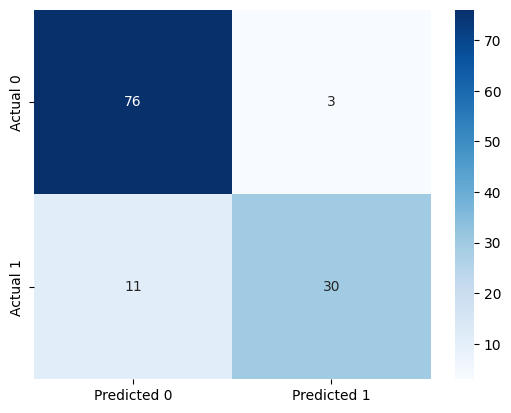

In [72]:
# DataFrame from Confusion Matrix
cm_df = pd.DataFrame(cm, index = ['Actual 0', 'Actual 1'], columns = ['Predicted 0', 'Predicted 1'])
sns.heatmap(cm_df, annot=True, fmt='d', cmap="Blues")